# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device


2.3.0+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

**Computer Vision** is a sub field of AI which enabled machines to derive some meaningful information through identifying objects / items or patterns in an image. Computer vision has many fields of implications namely
* health care
* Robitics
* Self Driving Cards
* Object detection and facial recognition
* Pattern detection and classification
* OCR
* Digital Pathology
* Plant disease detection etc.

The applications are endless as the world is become more image driven

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

**Overfitting** in a model defines the scenario where the model's parametrs are extremely adjusted to the training dataset that it fits a over-ambitious polynomial. It achieves 100% accuracy and predicts true positives for all training data. The issue with overfitting a model is it will be stumped with new test dta and any outliers and will not be able to predict well with good accuracy for new unseen data.



## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.
* The training data contains large amounts of irrelevant information, called noisy data.
* The model trains for too long on a single sample set of data.
* The model complexity is high, so it learns the noise within the training data.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


In [5]:
#get the dataset from MNIST
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform = None

)

print(f"Train data length: {len(train_data)}")
print(f"Test data length: {len(test_data)}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15970909.53it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 487081.44it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4378706.71it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3941760.56it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Train data length: 60000
Test data length: 10000


## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image shape: torch.Size([1, 28, 28])
Target label is:5 - five


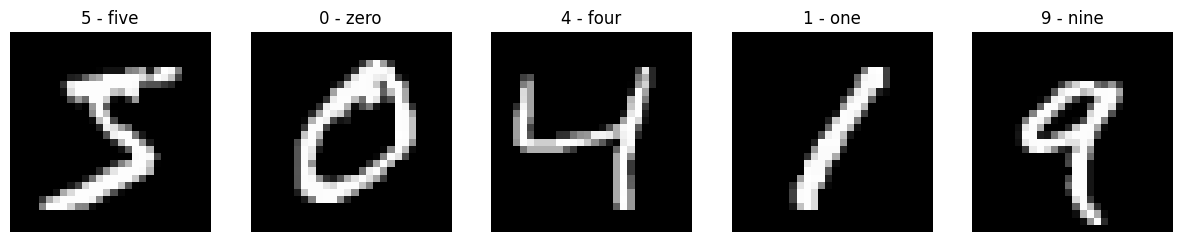

In [7]:
classnames = train_data.classes
class_to_idx = train_data.class_to_idx
#checking shapoe oif single test data and label.
image,label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Target label is:{classnames[label]}")


#lets vizualize the data
fig, axes = plt.subplots(nrows = 1,
                        ncols = 5,
                        figsize=(15,3))
for id in range(5):
  image, label = train_data[id]
  axes[id].imshow(image.squeeze(), cmap="gray")
  axes[id].set_title(classnames[label])
  axes[id].axis('Off')
plt.axis(False)
plt.show()


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader
#set up the batch size
batch_size = 32

#crete the train and test data loaders
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size=batch_size,
    shuffle = True
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = batch_size,
    shuffle=False
)


## checking the dataloaders, no of batches etc.
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"length of train Dataloader: {len(train_dataloader)} batches of size {batch_size} each")
print(f"length of test Dataloader: {len(test_dataloader)} batches of size {batch_size} each")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f0e38e8ea40>, <torch.utils.data.dataloader.DataLoader object at 0x7f0e38e8eb30>)
length of train Dataloader: 1875 batches of size 32 each
length of test Dataloader: 313 batches of size 32 each


32
batch shape: torch.Size([32, 1, 28, 28])


Text(0.5, 1.0, '0 - zero')

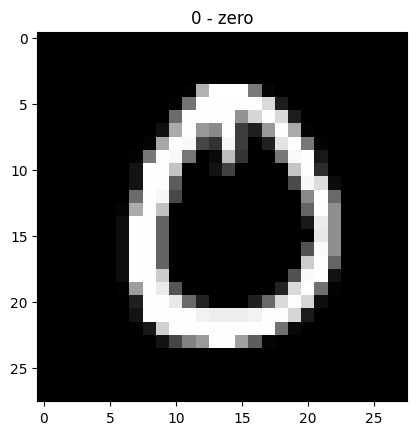

In [9]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(len(train_features_batch))
print(f"batch shape: {train_features_batch.shape}")
#lets look at a single item
img, label = train_features_batch[0], train_labels_batch[0]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classnames[label])

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [38]:
from torch import nn
class NumericTinyVGGModel(torch.nn.Module):
  """Model capable of predicting on MNIST dataset.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [39]:
#creating a model isntance
digit_model = NumericTinyVGGModel(input_shape=1,
                                  hidden_units=10,
                                  output_shape=len(classnames)).to(device)

In [40]:
#creating loss function and optimizer and accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = digit_model.parameters(),
                            lr=0.1)
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [42]:
# #sample pass through of a single image
# y = digit_model(image.squeeze())
# y



# a = torch.randn(size=(1,10,28,28))
# flat = nn.Flatten()
# r = flat(a)
# r.shape


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [28, 28]

In [43]:


#works fine, so lets create training and testing loop

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0,0
  #Loop through the training batches
  #print(f"Length of data loader: {len(dataloader)}")
  for batch, (X, y) in enumerate(dataloader):
    #put data to target device
    X,y = X.to(device), y.to(device)
    #print(f"Shape of input X: {X.shape} | length: {len(X)}")
    #1. Forward pass
    y_pred = model(X)
    #calculate the loss
    loss = loss_fn(y_pred,y)
    acc = accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))
    #accumulate the loss
    train_loss += loss
    train_acc += acc

    #optimizer zero grad
    optimizer.zero_grad()
    #back propogation
    loss.backward()
    #optoimizer step
    optimizer.step()
  #Out of loop Avg out the losses.
  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  #print out whats happenin'
  print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_acc:.2f}%")



In [44]:
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              accuracy_fn):
  """Test step for training any model"""
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    #loop though the test data loader
    for X_test, y_test in dataloader:
      #move to device
      X_test, y_test = X_test.to(device), y_test.to(device)
      #forward pass
      test_pred = model(X_test)
      #calc loss
      loss = loss_fn(test_pred, y_test)
      #acc
      acc = accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))
      #accumulate the loss within the batch
      test_loss += loss
      test_acc += acc
    #out of loop average the loss per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
  #let's print out what's happenin
  print(f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [45]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm

epochs = 5
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}---------")
  train_step(model=digit_model,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             dataloader = train_dataloader)
  test_step(model=digit_model,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             dataloader = test_dataloader)
end_time = timer()
total_train_time = end_time - start_time
print(f"Total time taken for training model: {digit_model.__class__.__name__} is : {total_train_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0---------
Train Loss: 0.4265 | Train Accuracy: 85.20%
Test Loss: 0.0920 | Test Acc: 97.25%
Epoch: 1---------
Train Loss: 0.0805 | Train Accuracy: 97.51%
Test Loss: 0.0598 | Test Acc: 98.13%
Epoch: 2---------
Train Loss: 0.0606 | Train Accuracy: 98.17%
Test Loss: 0.0490 | Test Acc: 98.47%
Epoch: 3---------
Train Loss: 0.0497 | Train Accuracy: 98.44%
Test Loss: 0.0406 | Test Acc: 98.70%
Epoch: 4---------
Train Loss: 0.0427 | Train Accuracy: 98.65%
Test Loss: 0.0302 | Test Acc: 99.05%
Total time taken for training model: NumericTinyVGGModel is : 412.94953835900003


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [46]:
digit_model.eval()
y_preds = []
with torch.inference_mode():
  for sample, label in test_data:
    #print(f"Sample: { sample.shape, label}")
    pred_logit = digit_model(sample.unsqueeze(dim =0))
    #print(f"logits: {pred_logit}")
    pred_labels = pred_logit.argmax(dim =1)
    y_preds.append(pred_labels)



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [47]:
try:
  import torchmetrics, mlxtend
  print(f"mlextend version: {mlxtend.__version__}")
  assert(int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-47-ff07d9c0d66c>:4: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.5 MB/s eta 0:00:00
mlxtend version: 0.23.1


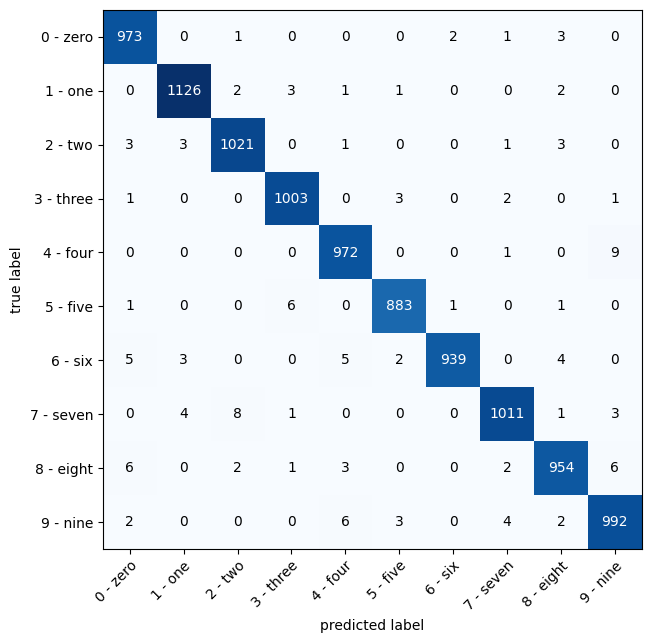

In [48]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion matric
y_pred_tensor = torch.cat(y_preds)
confmat = ConfusionMatrix(num_classes = len(classnames),
                          task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

#3. Plot the matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = classnames,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [59]:
random_tensor = torch.rand([1, 3, 64, 64])
print(random_tensor.shape)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=1,
                       padding=2)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

#Notes: As the stride increases the output shape gets starting reduced
# As the padding increases, it adds more dimensionality to the output every
# padding increases +2 pixels of outer border in the output visually %%
# [markdown]

torch.Size([1, 3, 64, 64])
Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 66, 66])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [60]:
#lets try the same for FashionMNIST data set
fashion_train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train = True, # do we want train dataset or test dataset
    download = True, # do we want to download data
    transform=ToTensor(), # how to transform the data
    target_transform=None #how to transformt he labels/targets
)

fashion_test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download = True,
    transform=ToTensor(),
    target_transform=None
)
len(fashion_train_data), len(fashion_test_data)

100%|██████████| 26421880/26421880 [00:02<00:00, 13171805.87it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211410.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3938807.59it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4729962.10it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(60000, 10000)

In [63]:
fashion_classnames = fashion_train_data.classes
fashion_classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [64]:
BATCH_SIZE = 32

# Turn data into iterables
fashion_train_dataloader = DataLoader(
    dataset = fashion_train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
fashion_test_dataloader = DataLoader(
    dataset = fashion_test_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [68]:
#Training and testing the FashionMNIST Model
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm

epochs = 5
fashion_start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}---------")
  train_step(model=digit_model,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             dataloader = fashion_train_dataloader)
  test_step(model=digit_model,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             dataloader = fashion_test_dataloader)
fashion_end_time = timer()
fashion_total_train_time = fashion_end_time - fashion_start_time
print(f"Total time taken for training FashionMNIST data on Model: {digit_model.__class__.__name__} is : {fashion_total_train_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0---------
Train Loss: 0.2708 | Train Accuracy: 90.26%
Test Loss: 0.2965 | Test Acc: 89.13%
Epoch: 1---------
Train Loss: 0.2630 | Train Accuracy: 90.48%
Test Loss: 0.3479 | Test Acc: 87.38%
Epoch: 2---------
Train Loss: 0.2574 | Train Accuracy: 90.68%
Test Loss: 0.2796 | Test Acc: 90.15%
Epoch: 3---------
Train Loss: 0.2516 | Train Accuracy: 90.83%
Test Loss: 0.2979 | Test Acc: 89.88%
Epoch: 4---------
Train Loss: 0.2488 | Train Accuracy: 90.95%
Test Loss: 0.2756 | Test Acc: 90.18%
Total time taken for training FashionMNIST data on Model: NumericTinyVGGModel is : 295.0708023510001


In [69]:
digit_model.eval()
fashion_y_preds = []
with torch.inference_mode():
  for sample, label in fashion_test_data:
    #print(f"Sample: { sample.shape, label}")
    fashion_pred_logit = digit_model(sample.unsqueeze(dim =0))
    #print(f"logits: {pred_logit}")
    fashion_pred_labels = fashion_pred_logit.argmax(dim =1)
    fashion_y_preds.append(pred_labels)


In [72]:
set(fashion_y_preds)


{tensor([6])}

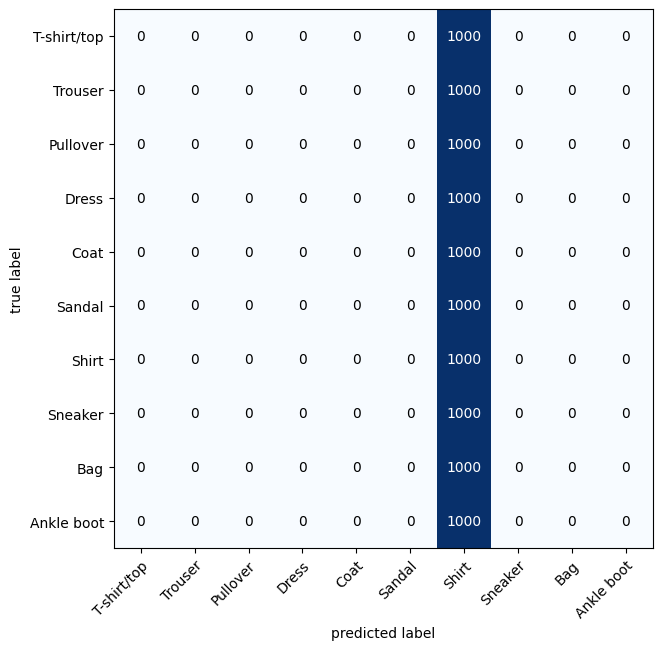

In [70]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion matric
fashion_y_pred_tensor = torch.cat(fashion_y_preds)
fashion_confmat = ConfusionMatrix(num_classes = len(fashion_classnames),
                          task = 'multiclass')
fashion_confmat_tensor = fashion_confmat(preds = fashion_y_pred_tensor,
                         target = fashion_test_data.targets)

#3. Plot the matrix
fig, ax = plot_confusion_matrix(
    conf_mat = fashion_confmat_tensor.numpy(),
    class_names = fashion_classnames,
    figsize=(10,7)
)